In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

In [2]:
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from tqdm import tqdm
img_data=[]

In [3]:

from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

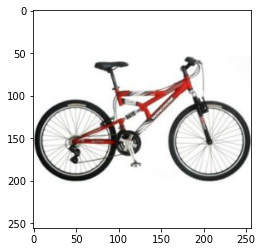

In [18]:
img=cv2.imread('bike.jpg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))
img.size
imshow(img)

In [4]:
def gaussiannoise(img):
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    img=cv2.add(img,gauss)
    return img


(0, 256, 256, 3)


(1, 256, 256, 3)

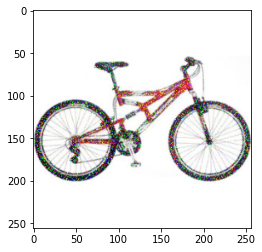

In [5]:

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

print(img_array.shape)


img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('bike.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2 = gaussiannoise(img2)
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))
imshow(img2)
img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.
img_array2.shape


# img_data3=[]  #Second image to be provided as ground truth. 

# img3=cv2.imread('frame_0002.jpg', 1)   #Change 1 to 0 for Grey scale images
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
# img3 = gaussiannoise(img3)
# img3=cv2.resize(img2,(SIZE, SIZE))
# img_data3.append(img_to_array(img3))

# img_array3 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
# img_array3 = img_array2.astype('float32') / 255.
# img_array3.shape



In [14]:


#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(64, (6, 6), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (6, 6), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

model.fit(img_array2, img_array,
        epochs=1000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch




0.3790
Epoch 805/1000
1/1 [==============================] - 0s 275ms/step - loss: 0.0042 - accuracy: 0.3812
Epoch 806/1000
1/1 [==============================] - 0s 313ms/step - loss: 0.0042 - accuracy: 0.3773
Epoch 807/1000
1/1 [==============================] - 0s 300ms/step - loss: 0.0042 - accuracy: 0.3804
Epoch 808/1000
1/1 [==============================] - 0s 294ms/step - loss: 0.0042 - accuracy: 0.3781
Epoch 809/1000
1/1 [==============================] - 0s 277ms/step - loss: 0.0042 - accuracy: 0.3815
Epoch 810/1000
1/1 [==============================] - 0s 294ms/step - loss: 0.0042 - accuracy: 0.3770
Epoch 811/1000
1/1 [==============================] - 0s 282ms/step - loss: 0.0043 - accuracy: 0.3813
Epoch 812/1000
1/1 [==============================] - 0s 280ms/step - loss: 0.0043 - accuracy: 0.3762
Epoch 813/1000
1/1 [==============================] - 0s 272ms/step - loss: 0.0043 - accuracy: 0.3823
Epoch 814/1000
1/1 [==============================] - 0s 282ms/step - loss:

Output
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
196608


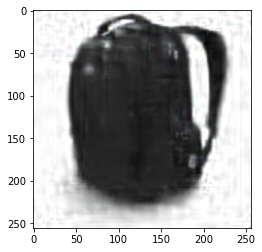

In [15]:
print("Output")
pred = model.predict(img_array2)   #Predict model on the same input array.
print(pred.size)
#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE,3))


#img2 = Image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg")